In [88]:
### Matching Mentors Mentees
## sentence-transformers/all-MiniLM-L6-v2
## https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2
## Main page https://huggingface.co/sentence-transformers
## "This is a sentence-transformers model: It maps sentences & paragraphs
## to a 384 dimensional dense vector space and can be used for tasks
## like clustering or semantic search."

## I've generated 2 example CSV files with 60 mentors and 375 mentees.
## Mentors and mentees have a "name_id" and "keywords"
## I've used a sentence transformer to extract features and do the pairing.
## In this example, the all-MiniLM-L6-v2 transformers looks for semantic similarities
## and evaluates "keywords". It could also extract features from longer
## sentences, so it could evaluate sentence similarities for "statements" or "descriptions"
## from mentors and mentees, eventually.

In [89]:
# install sentence transformer 🚚
!pip install -U sentence-transformers

In [90]:
# import packages 📦
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer, util

In [91]:
# Load CSV files
mentors_df = pd.read_csv('mentors.csv')
mentees_df = pd.read_csv('mentees.csv')

# Extract names and keywords
mentors = mentors_df[['name', 'keywords']]
mentees = mentees_df[['name', 'keywords']]

In [92]:
## Load Model sentence-transformers/all-MiniLM-L6-v2🤗

In [93]:
# Load pre-trained sentence transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Function to compute embeddings
def compute_embeddings(dataframe):
    return model.encode(dataframe['keywords'].tolist(), convert_to_tensor=True)

# Compute embeddings for mentors and mentees
mentor_embeddings = compute_embeddings(mentors)
mentee_embeddings = compute_embeddings(mentees)


In [72]:
## Matching 🧩

In [94]:
# Dictionary to keep track of mentor matches
mentor_match_count = {mentor: 0 for mentor in mentors['name']}

# Set of all mentee names, to look for unmatch later
unmatched_mentees = set(mentees['name'])

# Match mentors and mentees
matches = []
for mentee_idx, mentee_embedding in enumerate(mentee_embeddings):
    # Compute cosine similarity
    similarities = util.cos_sim(mentee_embedding, mentor_embeddings)[0]

    # Iterate over similarities to find an available mentor
    for best_match_idx in similarities.argsort(descending=True):
        best_match_idx = best_match_idx.item()  # Convert to integer
        mentor_name = mentors['name'].iloc[best_match_idx]

        # Check if mentor has not exceeded match limit
        if mentor_match_count[mentor_name] < 10:
            mentee_name = mentees['name'].iloc[mentee_idx]
            matches.append((mentee_name, mentor_name))
            mentor_match_count[mentor_name] += 1
            # Remove matched mentee from the set
            unmatched_mentees.discard(mentee_name)
            break


In [95]:
# Print the matches by mentees 🖨
for mentee, mentor in matches:
  print(f"Mentee: {mentee} is best matched with Mentor: {mentor}")

Mentee: Mentee_1 is best matched with Mentor: Mentor_24
Mentee: Mentee_2 is best matched with Mentor: Mentor_18
Mentee: Mentee_3 is best matched with Mentor: Mentor_31
Mentee: Mentee_4 is best matched with Mentor: Mentor_27
Mentee: Mentee_5 is best matched with Mentor: Mentor_19
Mentee: Mentee_6 is best matched with Mentor: Mentor_35
Mentee: Mentee_7 is best matched with Mentor: Mentor_31
Mentee: Mentee_8 is best matched with Mentor: Mentor_34
Mentee: Mentee_9 is best matched with Mentor: Mentor_20
Mentee: Mentee_10 is best matched with Mentor: Mentor_50
Mentee: Mentee_11 is best matched with Mentor: Mentor_18
Mentee: Mentee_12 is best matched with Mentor: Mentor_34
Mentee: Mentee_13 is best matched with Mentor: Mentor_11
Mentee: Mentee_14 is best matched with Mentor: Mentor_53
Mentee: Mentee_15 is best matched with Mentor: Mentor_57
Mentee: Mentee_16 is best matched with Mentor: Mentor_32
Mentee: Mentee_17 is best matched with Mentor: Mentor_16
Mentee: Mentee_18 is best matched with M

In [96]:
## Save Mentors-Mentees Matching as a CSV 👩‍🏫🧑🏿‍🏫👨🏻‍🏫👩🏽‍🎓👨‍🎓🧑🏻‍🎓

In [97]:
# Convert the list of matches to a DataFrame
matches_df = pd.DataFrame(matches, columns=['Mentee', 'Mentor'])

# Save the DataFrame to a CSV file
matches_df.to_csv('mentor_mentee_matches.csv', index=False)

In [98]:
## Spot lonely Mentors, print and save a CSV 💫

In [99]:
# Identify and print unpaired mentors
unpaired_mentors = [mentor for mentor, count in mentor_match_count.items() if count == 0]
print("Unpaired Mentors:")
for mentor in unpaired_mentors:
    print(mentor)

# Convert the list of unpaired mentors to a DataFrame
unpaired_mentors_df = pd.DataFrame(unpaired_mentors, columns=['Unpaired Mentor'])

# Save the DataFrame of unpaired mentors to a CSV file
unpaired_mentors_df.to_csv('unpaired_mentors.csv', index=False)

Unpaired Mentors:
Mentor_9
Mentor_17
Mentor_26
Mentor_43
Mentor_44
Mentor_54


In [100]:
## Unmatched Mentees (Home Alone) 🏡
## Print and save a CSV

In [101]:
# Print and save the unmatched mentees
print("Unmatched Mentees:")
for mentee in unmatched_mentees:
    print(mentee)

# Convert the set of unmatched mentees to a DataFrame
unmatched_mentees_df = pd.DataFrame(list(unmatched_mentees), columns=['Unmatched Mentee'])

# Save the DataFrame of unmatched mentees to a CSV file
unmatched_mentees_df.to_csv('unmatched_mentees.csv', index=False)

Unmatched Mentees:


In [82]:
## Data Visualization

In [83]:
# WordCloud from CSV files ☁️☁️☁️

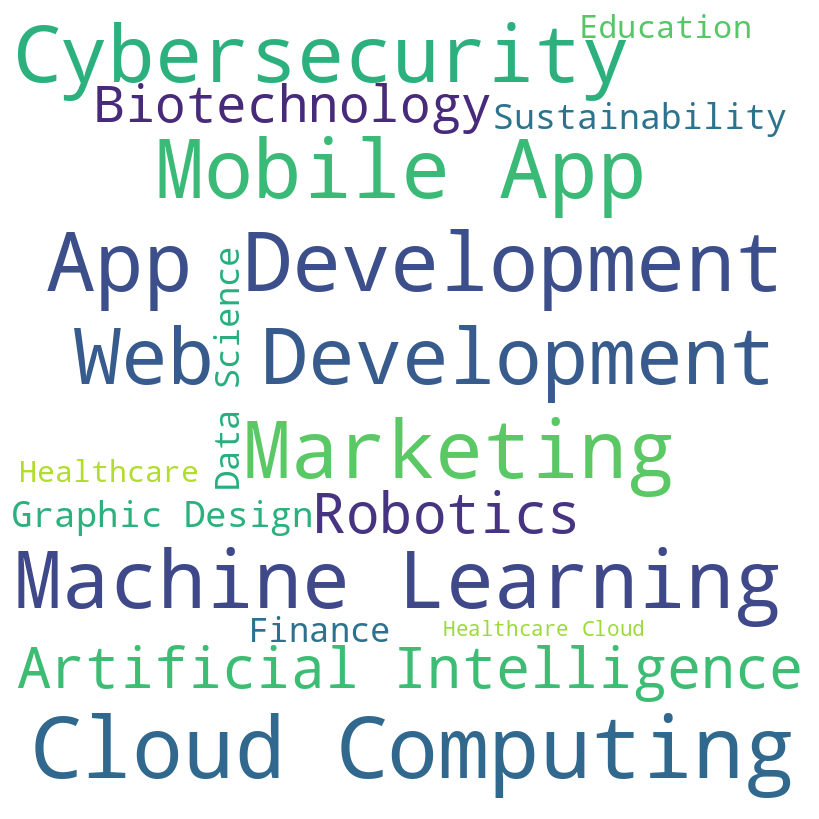

In [84]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load CSV files
mentors_df = pd.read_csv('mentors.csv')
mentees_df = pd.read_csv('mentees.csv')

# Combine the keywords from both mentors and mentees
all_keywords = pd.concat([mentors_df['keywords'], mentees_df['keywords']])

# Join all keywords into a single string
text = ' '.join(all_keywords)

# Generate the word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(text)

# Plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


In [85]:
# Visualize Number of mentees per mentor

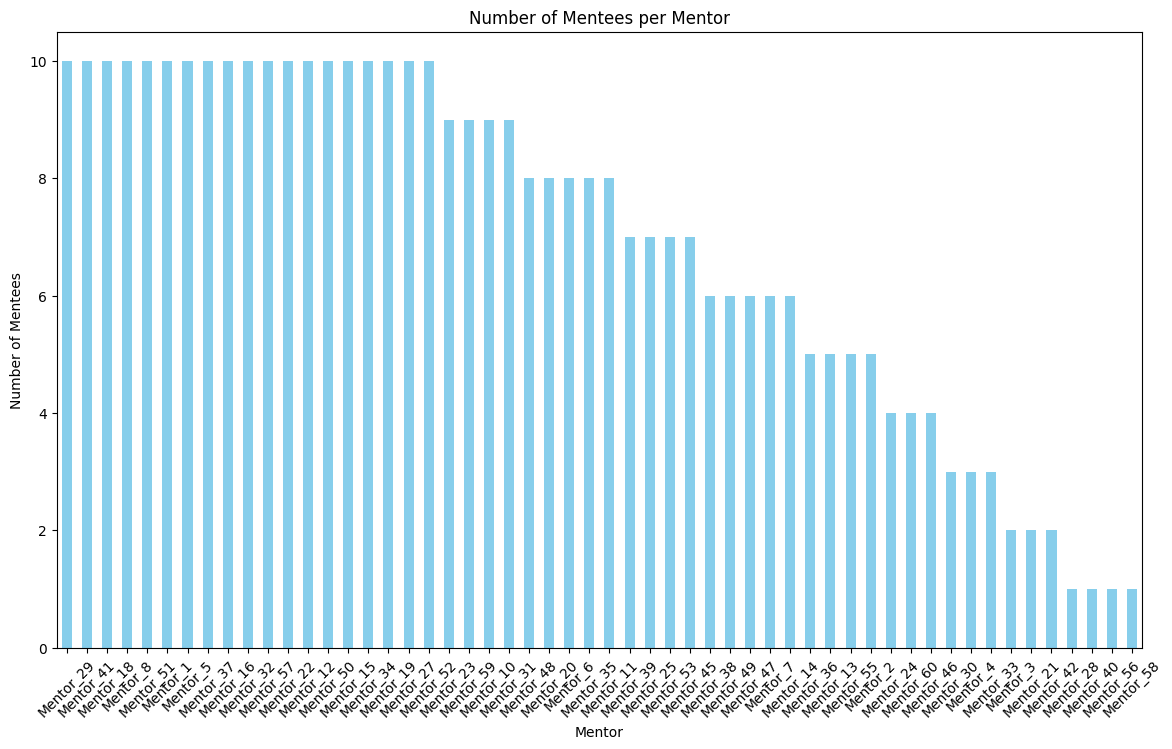

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the list of matches to a DataFrame
matches_df = pd.DataFrame(matches, columns=['Mentee', 'Mentor'])

# Count the number of mentees for each mentor
mentee_count_per_mentor = matches_df['Mentor'].value_counts()

# Plot the distribution
mentee_count_per_mentor.plot(kind='bar', figsize=(14, 8), color='skyblue')

plt.title('Number of Mentees per Mentor')
plt.xlabel('Mentor')
plt.ylabel('Number of Mentees')
plt.xticks(rotation=45)
plt.show()
